<a href="https://colab.research.google.com/github/Magaton1010/Python_Analysis/blob/main/K_mean_with_(ARI)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Methods: Data Analysis and Clustering Approach**
The analytical steps taken in this project are outlined as follows:
•	Outlier Detection and Removal: Outliers were filtered by excluding values above the 99th percentile in both V1 and V2. This step ensured that the clustering algorithm was not disproportionately influenced by extreme values.
•	Data Normalization: To ensure that both feature variables contributed equally to the clustering process, the data was normalized using the StandardScaler() Function. This standardization process transformed the data such that each variable had a mean of 0 and a standard deviation of 1.
•	K-Means Clustering: The K-Means clustering algorithm was applied to the preprocessed data with k=2, dividing the dataset into two clusters. K-Means assigns each data point to one of the clusters based on the nearest mean of the cluster centers. The number of clusters (k) was selected based on the assumption that two distinct segments exist in the dataset.
•	Clustering Performance Evaluation: Two metrics were used to assess the quality of the clustering:
o	Adjusted Rand Index (ARI): ARI measures the similarity between the clustering results and the true labels (Y), accounting for chance. A value of 1 indicates perfect agreement between the predicted clusters and the actual labels, while 0 indicates random assignment.
o	Accuracy Score: Accuracy was used to measure the percentage of correct cluster assignments relative to the true labels. This gives a straightforward understanding of how well the clustering algorithm performed.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install openml
import openml
# This is done based on the dataset ID ('did').
dataset = openml.datasets.get_dataset(1462)

In [ ]:
X, y, attribute_names,_ = dataset.get_data(
    target=dataset.default_target_attribute
)
df2 = pd.DataFrame(X)
Y = [int(yi) - 1 for yi in y]
df2['Y'] = Y

Libraries Used:

sklearn.metrics.adjusted_rand_score:

From scikit-learn, a widely used machine learning library in Python.
adjusted_rand_score computes how similar the two sets of labels are, adjusting for random chance. It is useful when you want to evaluate clustering algorithms, where exact label values might not match, but the clustering structure matters.


sklearn.metrics.accuracy_score:

Also from scikit-learn.
accuracy_score is used for classification tasks. It compares the actual labels with predicted ones and calculates the ratio of correct predictions.

<ipython-input-14-e88b6fcc75eb>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.fit_predict(data2)


Adjusted Rand Index (ARI): 0.5755974170707847
Accuracy: 87.95%


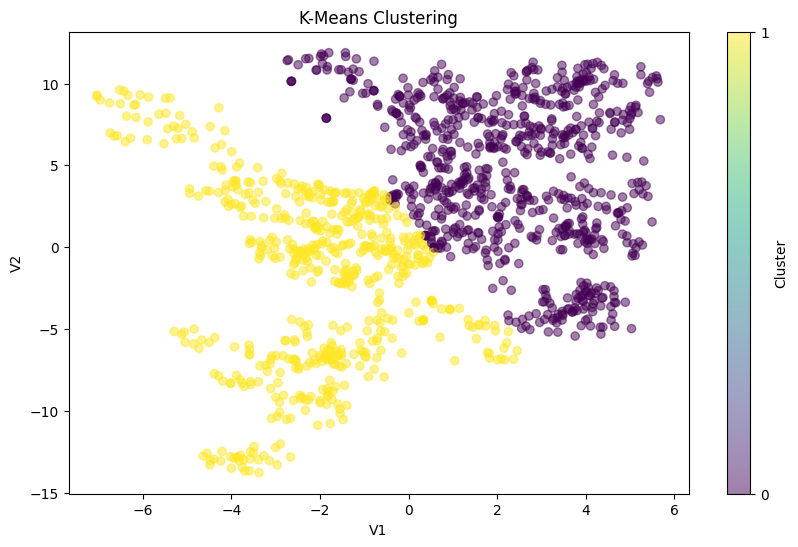

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import adjusted_rand_score, accuracy_score

##Filter out outliers (e.g., with extremely high or low values)
#can adjust the threshold as needed
trashhold_v1 = df2['V1'].quantile(0.99)
trashhold_v2 = df2['V2'].quantile(0.99)
data = df2[(df2['V1'] < trashhold_v1) & (df2['V2'] < trashhold_v2)]

# Normalize the data
scaler = StandardScaler()
data2 = scaler.fit_transform(data[['V1', 'V2']])

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data2)

# Evaluate clustering using ARI and accuracy
ari = adjusted_rand_score(data['Y'], data['cluster'])
accuracy = accuracy_score(data['Y'], data['cluster'])

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the clusters with transparency
plt.figure(figsize=(10, 6))
plt.scatter(data['V1'], data['V2'], c=data['cluster'], cmap='viridis', alpha=0.5) # Added alpha=0.5 for transparency
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster', ticks=[0, 1]) #Specify ticks for the colorbar
plt.show()

When you use metrics like Adjusted Rand Index (ARI) or Accuracy to compare the true labels (data['Y']) with the predicted clusters (data['cluster']), you might wonder how these metrics match the labels if there’s no index column. Here’s how the matching works in this context:

Implicit Matching by Position:
In both clustering and classification tasks, the labels are compared element-wise based on their position in the arrays (or columns). There’s no need for an explicit index column because these metrics operate on the assumption that the i-th element in both data['Y'] and data['cluster'] corresponds to the same data point.

True labels (data['Y']): This is an array of ground truth labels for each data point.
Predicted clusters (data['cluster']): This is an array of the predicted cluster labels for each data point.


Adjusted Rand Index (ARI): 0.5755974170707847
Accuracy: 87.95%
   Index  Y  cluster
0      0  0        0
1      1  0        0
2      2  0        0
3      3  0        0
4      4  0        1
5      5  0        0
6      6  0        0
7      7  0        1
8      8  0        0
9      9  0        0


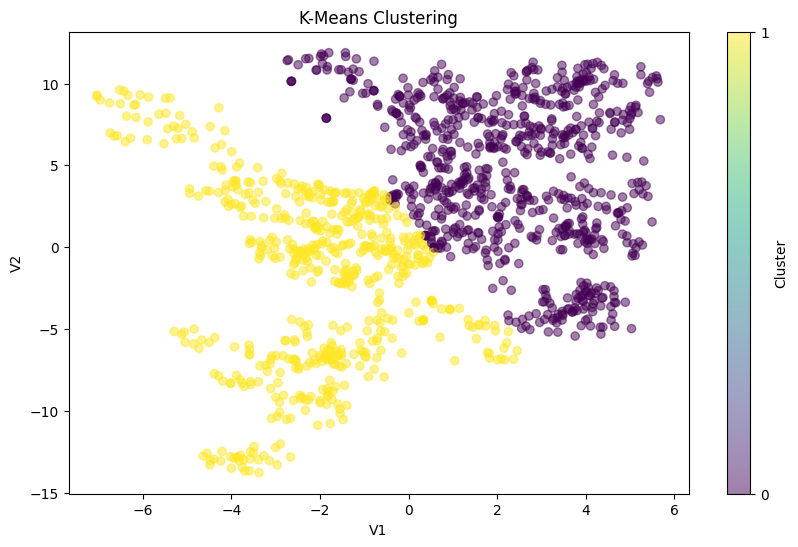

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, accuracy_score

# Add index to the DataFrame
df2.index.name = 'Index'

# Filter out outliers (e.g., with extremely high or low values)
# You can adjust the threshold as needed
threshold_v1 = df2['V1'].quantile(0.99)
threshold_v2 = df2['V2'].quantile(0.99)
data = df2[(df2['V1'] < threshold_v1) & (df2['V2'] < threshold_v2)]

# Keep the original index intact
data = data.reset_index()  # Reset index to keep the old index as a column

# Normalize the data
scaler = StandardScaler()
data2 = scaler.fit_transform(data[['V1', 'V2']])

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data2)

# Evaluate clustering using ARI and accuracy
ari = adjusted_rand_score(data['Y'], data['cluster'])
accuracy = accuracy_score(data['Y'], data['cluster'])

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Verify alignment by inspecting the Index, True Labels (Y), and Predicted Clusters
print(data[['Index', 'Y', 'cluster']].head(10))  # Print the first 10 rows for comparison

# Plot the clusters with transparency
plt.figure(figsize=(10, 6))
plt.scatter(data['V1'], data['V2'], c=data['cluster'], cmap='viridis', alpha=0.5)  # Added alpha=0.5 for transparency
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster', ticks=[0, 1])  # Specify ticks for the colorbar
plt.show()

